### Prepare the dataset

In [1]:
import pandas as pd
test_df = pd.read_csv('test_results_by_algorithm(1).csv')

pd.set_option('display.max_rows', None)

In [2]:
#rename Unnamed: 0 to Methods
test_df = test_df.rename({'Unnamed: 0':'Methods'}, axis='columns')

In [3]:
test_df

,Methods,CHN 1992 - 1995: Accuracy on target,CHN 1992 - 1995: Additional found,CHN 1992 - 1995: F1,TUN 2011 - 2020: Accuracy on target,TUN 2011 - 2020: Additional found,TUN 2011 - 2020: F1,CRI 1949 - 2015: Accuracy on target,CRI 1949 - 2015: Additional found,CRI 1949 - 2015: F1,...,TZA 1992 - 2020: Additional found,TZA 1992 - 2020: F1,COL 2000 - 2016: Accuracy on target,COL 2000 - 2016: Additional found,COL 2000 - 2016: F1,NOR 1970 - 2013: Accuracy on target,NOR 1970 - 2013: Additional found,NOR 1970 - 2013: F1,Mean accuracy,Mean F1
0,ECOD,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,324,0.000000,0.000000,197,0.000000,0.068182,510,0.010830,0.128274,0.045091
1,ECOD_minmax_scale,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,324,0.000000,0.000000,197,0.000000,0.068182,510,0.010830,0.128274,0.045091
2,ECOD_robust_scale,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,324,0.000000,0.000000,197,0.000000,0.068182,510,0.010830,0.128274,0.045091
3,ECOD_scale,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,324,0.000000,0.000000,197,0.000000,0.068182,510,0.010830,0.128274,0.045091
4,ECOD_normalize,0.00,45,0.00,0.000000,8,0.000000,0.170213,84,0.122137,...,238,0.000000,0.000000,196,0.000000,0.000000,510,0.000000,0.126444,0.046499
5,COPOD,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,324,0.056818,0.000000,197,0.000000,0.181818,510,0.028881,0.199663,0.070850
6,COPOD_minmax_scale,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,324,0.056818,0.000000,197,0.000000,0.181818,510,0.028881,0.199663,0.070850
7,COPOD_robust_scale,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,324,0.056818,0.000000,197,0.000000,0.181818,510,0.028881,0.199663,0.070850
8,COPOD_scale,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,324,0.056818,0.000000,197,0.000000,0.181818,510,0.028881,0.199663,0.070850
9,COPOD_normalize,0.00,46,0.00,0.222222,8,0.235294,0.000000,84,0.000000,...,315,0.000000,0.000000,197,0.000000,0.000000,510,0.000000,0.132143,0.053321


### Performing Difference Checks based on Mean F1, Mean Accuracy, and Cook's Distance

In [4]:
from scipy.stats import zscore, norm

In [5]:
mean_cooks_distance = 0.152521
mean_recall_score = test_df["Mean accuracy"].mean()
mean_f1_score= test_df['Mean F1'].mean()

In [6]:
#recall difference
test_df['Recall Difference'] = test_df['Mean accuracy'] - mean_recall_score 

#f1 difference
test_df['F1 Difference'] = test_df['Mean F1'] - mean_f1_score

#mean value difference from cook's distance
test_df['Cook\'s Distance Difference'] = test_df['Mean accuracy'] - mean_cooks_distance

#z value of cook's distance
test_df['Z-value (Cook\'s Distance)'] = test_df['Cook\'s Distance Difference'] / test_df['Mean accuracy'].std(ddof=0)

#z value of recall
test_df['Z-value (Recall)'] = test_df['Recall Difference'] / test_df['Mean accuracy'].std(ddof=0)

#z value of f1
test_df['Z-value (F1)'] = test_df['F1 Difference'] / test_df['Mean F1'].std(ddof=0)

#p value of cook's distance
test_df['P-value (Cook\'s Distance)'] = (1 - norm.cdf(abs(test_df['Z-value (Cook\'s Distance)'])))

#p value of recall
test_df['P-value (Recall)'] = (1 - norm.cdf(abs(test_df['Z-value (Recall)'])))

# p value of f1
test_df['P-value (F1)'] = (1 - norm.cdf(abs(test_df['Z-value (F1)'])))

In [7]:
test_df

,Methods,CHN 1992 - 1995: Accuracy on target,CHN 1992 - 1995: Additional found,CHN 1992 - 1995: F1,TUN 2011 - 2020: Accuracy on target,TUN 2011 - 2020: Additional found,TUN 2011 - 2020: F1,CRI 1949 - 2015: Accuracy on target,CRI 1949 - 2015: Additional found,CRI 1949 - 2015: F1,...,Mean F1,Recall Difference,F1 Difference,Cook's Distance Difference,Z-value (Cook's Distance),Z-value (Recall),Z-value (F1),P-value (Cook's Distance),P-value (Recall),P-value (F1)
0,ECOD,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,0.045091,-0.028683,-0.009724,-2.424661e-02,-0.344010,-0.406953,-0.443976,0.365419,0.342021,0.328530
1,ECOD_minmax_scale,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,0.045091,-0.028683,-0.009724,-2.424661e-02,-0.344010,-0.406953,-0.443976,0.365419,0.342021,0.328530
2,ECOD_robust_scale,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,0.045091,-0.028683,-0.009724,-2.424661e-02,-0.344010,-0.406953,-0.443976,0.365419,0.342021,0.328530
3,ECOD_scale,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,0.045091,-0.028683,-0.009724,-2.424661e-02,-0.344010,-0.406953,-0.443976,0.365419,0.342021,0.328530
4,ECOD_normalize,0.00,45,0.00,0.000000,8,0.000000,0.170213,84,0.122137,...,0.046499,-0.030514,-0.008316,-2.607723e-02,-0.369983,-0.432926,-0.379715,0.355698,0.332534,0.352078
5,COPOD,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,0.070850,0.042706,0.016034,4.714221e-02,0.668852,0.605908,0.732099,0.251795,0.272288,0.232054
6,COPOD_minmax_scale,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,0.070850,0.042706,0.016034,4.714221e-02,0.668852,0.605908,0.732099,0.251795,0.272288,0.232054
7,COPOD_robust_scale,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,0.070850,0.042706,0.016034,4.714221e-02,0.668852,0.605908,0.732099,0.251795,0.272288,0.232054
8,COPOD_scale,0.00,46,0.00,0.222222,8,0.235294,0.170213,84,0.122137,...,0.070850,0.042706,0.016034,4.714221e-02,0.668852,0.605908,0.732099,0.251795,0.272288,0.232054
9,COPOD_normalize,0.00,46,0.00,0.222222,8,0.235294,0.000000,84,0.000000,...,0.053321,-0.024815,-0.001494,-2.037814e-02,-0.289124,-0.352067,-0.068218,0.386243,0.362394,0.472806


In [8]:
test_df['StdDev with respect to Cook\'s Distance'] = 0.0  

# get the standard deviation of all mean accuracy values
std_dev_all_methods = test_df['Mean accuracy'].std(ddof=0)

for index, row in test_df.iterrows():
    mean_accuracy = row['Mean accuracy']
    
    # calculate standard deviation with respect to Cook's Distance
    std_dev_with_respect_to_cook = abs((mean_accuracy - mean_cooks_distance) / std_dev_all_methods)
    
    test_df.at[index, 'StdDev with respect to Cook\'s Distance'] = std_dev_with_respect_to_cook

### Significance Stars

In [9]:
significance_level = 0.1
second_sig = 0.05
third_sig = 0.01

test_df['Significance Stars (Cook\'s Distance)'] = ''

for i in range(len(test_df)):
    p_value = test_df.loc[i, 'P-value (Cook\'s Distance)']
    if p_value > significance_level:
        test_df.loc[i, 'Significance Stars (Cook\'s Distance)'] = ''
    elif significance_level > p_value >= second_sig:
        test_df.loc[i, 'Significance Stars (Cook\'s Distance)'] = '*'
    elif second_sig > p_value >= third_sig:
        test_df.loc[i, 'Significance Stars (Cook\'s Distance)'] = '**'
    elif third_sig > p_value>= 0:
        test_df.loc[i, 'Significance Stars (Cook\'s Distance)'] = '***'
    else: 
        test_df.loc[i, 'Significance Stars (Cook\'s Distance)'] = '****'

In [10]:
test_df['Significance Stars (Recall)'] = ''

for i in range(len(test_df)):
    p_value = test_df.loc[i, 'P-value (Recall)']
    if p_value > significance_level:
        test_df.loc[i, 'Significance Stars (Recall)'] = ''
    elif significance_level > p_value >= second_sig:
        test_df.loc[i, 'Significance Stars (Recall)'] = '*'
    elif second_sig > p_value >= third_sig:
        test_df.loc[i, 'Significance Stars (Recall)'] = '**'
    elif third_sig > p_value>0:
        test_df.loc[i, 'Significance Stars (Recall)'] = '***'
    else:
        test_df.loc[i, 'Significance Stars (Recall)'] = '****'

In [11]:
test_df['Significance Stars (F1)'] = ''

for i in range(len(test_df)):
    p_value = test_df.loc[i, 'P-value (F1)']
    if p_value > significance_level:
        test_df.loc[i, 'Significance Stars (F1)'] = ''
    elif significance_level > p_value >= second_sig:
        test_df.loc[i, 'Significance Stars (F1)'] = '*'
    elif second_sig > p_value >= third_sig:
        test_df.loc[i, 'Significance Stars (F1)'] = '**'
    elif third_sig > p_value>0:
        test_df.loc[i, 'Significance Stars (F1)'] = '***'
    else:
        test_df.loc[i, 'Significance Stars (F1)'] = '****'

In [12]:
# sorting the Mean accuracy column and find a method that performs the best
sorted_df = test_df.sort_values(by=['Mean accuracy'], ascending=False)
sorted_df

,Methods,CHN 1992 - 1995: Accuracy on target,CHN 1992 - 1995: Additional found,CHN 1992 - 1995: F1,TUN 2011 - 2020: Accuracy on target,TUN 2011 - 2020: Additional found,TUN 2011 - 2020: F1,CRI 1949 - 2015: Accuracy on target,CRI 1949 - 2015: Additional found,CRI 1949 - 2015: F1,...,Z-value (Cook's Distance),Z-value (Recall),Z-value (F1),P-value (Cook's Distance),P-value (Recall),P-value (F1),StdDev with respect to Cook's Distance,Significance Stars (Cook's Distance),Significance Stars (Recall),Significance Stars (F1)
76,CBLOF_robust_scale,0.00,46,0.00,0.000000,8,0.000000,0.234043,84,0.167939,...,1.880076,1.817133,1.237802,0.030049,0.034598,0.107895,1.880076,**,**,
77,CBLOF_scale,0.00,46,0.00,0.000000,8,0.000000,0.255319,84,0.183206,...,1.776493,1.713550,1.222466,0.037826,0.043306,0.110766,1.776493,**,**,
55,LMDD_minmax_scale,1.00,46,0.16,0.444444,8,0.470588,0.000000,84,0.000000,...,1.733906,1.670963,0.784543,0.041467,0.047364,0.216361,1.733906,**,**,
61,LOF_robust_scale,0.25,46,0.04,0.222222,8,0.235294,0.127660,84,0.091603,...,1.733869,1.670926,1.339975,0.041471,0.047368,0.090127,1.733869,**,**,*
161,LUNAR_scale,0.00,46,0.00,0.000000,8,0.000000,0.276596,84,0.198473,...,1.718093,1.655150,1.136994,0.042890,0.048947,0.127770,1.718093,**,**,
159,LUNAR_minmax_scale,0.00,46,0.00,0.111111,8,0.117647,0.297872,84,0.213740,...,1.680247,1.617304,1.435925,0.046455,0.052906,0.075512,1.680247,**,*,*
64,COF,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,1.613547,1.550604,0.626233,0.053313,0.060498,0.265581,1.613547,*,*,
69,Incr. COF,0.00,46,0.00,0.000000,8,0.000000,0.127660,84,0.091603,...,1.613547,1.550604,0.626233,0.053313,0.060498,0.265581,1.613547,*,*,
160,LUNAR_robust_scale,0.00,46,0.00,0.000000,8,0.000000,0.234043,84,0.167939,...,1.597182,1.534239,0.951122,0.055113,0.062485,0.170771,1.597182,*,*,
38,KPCA_scale,0.00,46,0.00,0.000000,8,0.000000,0.234043,84,0.167939,...,1.575183,1.512239,0.941587,0.057607,0.065236,0.173202,1.575183,*,*,


In [13]:
# extract Methods and Mean accuracy col
main_df = sorted_df[['Methods', 'Mean accuracy']]
main_df

,Methods,Mean accuracy
76,CBLOF_robust_scale,0.285033
77,CBLOF_scale,0.277732
55,LMDD_minmax_scale,0.274731
61,LOF_robust_scale,0.274728
161,LUNAR_scale,0.273616
159,LUNAR_minmax_scale,0.270949
64,COF,0.266248
69,Incr. COF,0.266248
160,LUNAR_robust_scale,0.265094
38,KPCA_scale,0.263544


In [14]:
main_algorithms = main_df[~main_df['Methods'].str.contains('_')] 

In [15]:
additional_main_algorithms = []
for _, row in main_algorithms.iterrows():
    algorithm_name = row['Methods']
    for suffix in ['_minmax_scale', '_robust_scale', '_scale', '_normalize']:
        method_name = algorithm_name + suffix
        additional_main_algorithms.append({'Methods': method_name, 'Mean accuracy': row['Mean accuracy']})

In [16]:
main_algorithms = pd.concat([main_algorithms, pd.DataFrame(additional_main_algorithms)], ignore_index=True)

In [17]:
result_df = pd.DataFrame(columns=['Original Algorithm', 'Normalization Pair', 'Mean Recall Difference (Normalization Pairs - Original Algorithm)'])

In [18]:
for index, row in main_algorithms.iterrows():
    # extract the algorithm name
    algorithm_name = row['Methods']
    
    # extract the Mean accuracy of the main algorithm
    mean_recall_main = row['Mean accuracy']
    
    # find all normalization pairs related to the main algorithm
    normalization_pairs = main_df[main_df['Methods'].str.startswith(algorithm_name) & (main_df['Methods'] != algorithm_name)]
    
    for _, norm_row in normalization_pairs.iterrows():
        # extract the normalization pair name
        norm_pair_name = norm_row['Methods']
        
        # extract the Mean accuracy of the normalization pair
        mean_recall_norm = norm_row['Mean accuracy']
        
        # calculate the Mean recall difference
        mean_recall_diff = mean_recall_norm - mean_recall_main
        
        result_df = pd.concat([result_df, pd.DataFrame({'Original Algorithm': [algorithm_name], 'Normalization Pair': [norm_pair_name], 'Mean Recall Difference (Normalization Pairs - Original Algorithm)': [mean_recall_diff]})], ignore_index=True)

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_10845/346852443.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Original Algorithm': [algorithm_name], 'Normalization Pair': [norm_pair_name], 'Mean Recall Difference (Normalization Pairs - Original Algorithm)': [mean_recall_diff]})], ignore_index=True)


In [20]:
merged_df = pd.merge(result_df, sorted_df, left_on='Normalization Pair', right_on='Methods', how='left')

In [21]:
#extract essential columns
merged_df = merged_df[['Original Algorithm', 'Normalization Pair', 'Mean accuracy', 
                      'Mean Recall Difference (Normalization Pairs - Original Algorithm)',
                      'Recall Difference', 'Cook\'s Distance Difference',
                      'P-value (Recall)', 'StdDev with respect to Cook\'s Distance',
                      'Significance Stars (Recall)']]

### Final Results

In [24]:
merged_df = merged_df.sort_values(by=['Mean accuracy'], ascending=False)
merged_df

,Original Algorithm,Normalization Pair,Mean accuracy,Mean Recall Difference (Normalization Pairs - Original Algorithm),Recall Difference,Cook's Distance Difference,P-value (Recall),StdDev with respect to Cook's Distance,Significance Stars (Recall)
36,CBLOF,CBLOF_robust_scale,0.285033,0.083032,0.128076,0.132512,0.034598,1.880076,**
37,CBLOF,CBLOF_scale,0.277732,0.075731,0.120775,0.125211,0.043306,1.776493,**
12,LMDD,LMDD_minmax_scale,0.274731,0.036868,0.117773,0.122210,0.047364,1.733906,**
16,LOF,LOF_robust_scale,0.274728,0.040930,0.117771,0.122207,0.047368,1.733869,**
8,LUNAR,LUNAR_scale,0.273616,0.021205,0.116659,0.121095,0.048947,1.718093,**
9,LUNAR,LUNAR_minmax_scale,0.270949,0.018538,0.113991,0.118428,0.052906,1.680247,*
10,LUNAR,LUNAR_robust_scale,0.265094,0.012683,0.108137,0.112573,0.062485,1.597182,*
91,KPCA,KPCA_scale,0.263544,0.135218,0.106586,0.111023,0.065236,1.575183,*
38,CBLOF,CBLOF_minmax_scale,0.259462,0.057461,0.102505,0.106941,0.072927,1.517278,*
0,COF,COF_scale,0.254350,-0.011897,0.097393,0.101829,0.083515,1.444752,*


In [22]:
final_df = sorted_df[['Methods', 'Mean accuracy','Recall Difference', 'F1 Difference', 'Cook\'s Distance Difference'
                     ,'P-value (Recall)','StdDev with respect to Cook\'s Distance', 'Significance Stars (Recall)',
                     'Significance Stars (F1)']]

In [23]:
final_df

,Methods,Mean accuracy,Recall Difference,F1 Difference,Cook's Distance Difference,P-value (Recall),StdDev with respect to Cook's Distance,Significance Stars (Recall),Significance Stars (F1)
76,CBLOF_robust_scale,0.285033,0.128076,0.027110,1.325121e-01,0.034598,1.880076,**,
77,CBLOF_scale,0.277732,0.120775,0.026774,1.252113e-01,0.043306,1.776493,**,
55,LMDD_minmax_scale,0.274731,0.117773,0.017183,1.222097e-01,0.047364,1.733906,**,
61,LOF_robust_scale,0.274728,0.117771,0.029348,1.222071e-01,0.047368,1.733869,**,*
161,LUNAR_scale,0.273616,0.116659,0.024902,1.210952e-01,0.048947,1.718093,**,
159,LUNAR_minmax_scale,0.270949,0.113991,0.031449,1.184277e-01,0.052906,1.680247,*,*
64,COF,0.266248,0.109290,0.013716,1.137265e-01,0.060498,1.613547,*,
69,Incr. COF,0.266248,0.109290,0.013716,1.137265e-01,0.060498,1.613547,*,
160,LUNAR_robust_scale,0.265094,0.108137,0.020831,1.125731e-01,0.062485,1.597182,*,
38,KPCA_scale,0.263544,0.106586,0.020622,1.110225e-01,0.065236,1.575183,*,


### Boxplots

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
plots_df = final_df.loc[final_df['Methods'].isin(["CBLOF_robust_scale", "CBLOF_scale", "LMDD_minmax_scale", 'LOF_robust_scale',
                                      'LUNAR_scale', 'R-Graph_normalize', 'KPCA_normalize', 'SO_GAAL_minmax_scale',
                                      'DeepSVDD_normalize', 'ALAD_minmax_scale'])]

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_3325/1803804651.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Cook\'s Distance Difference', y='Methods', data=plots_df, ci="sd", join=False)
/Users/kei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDt

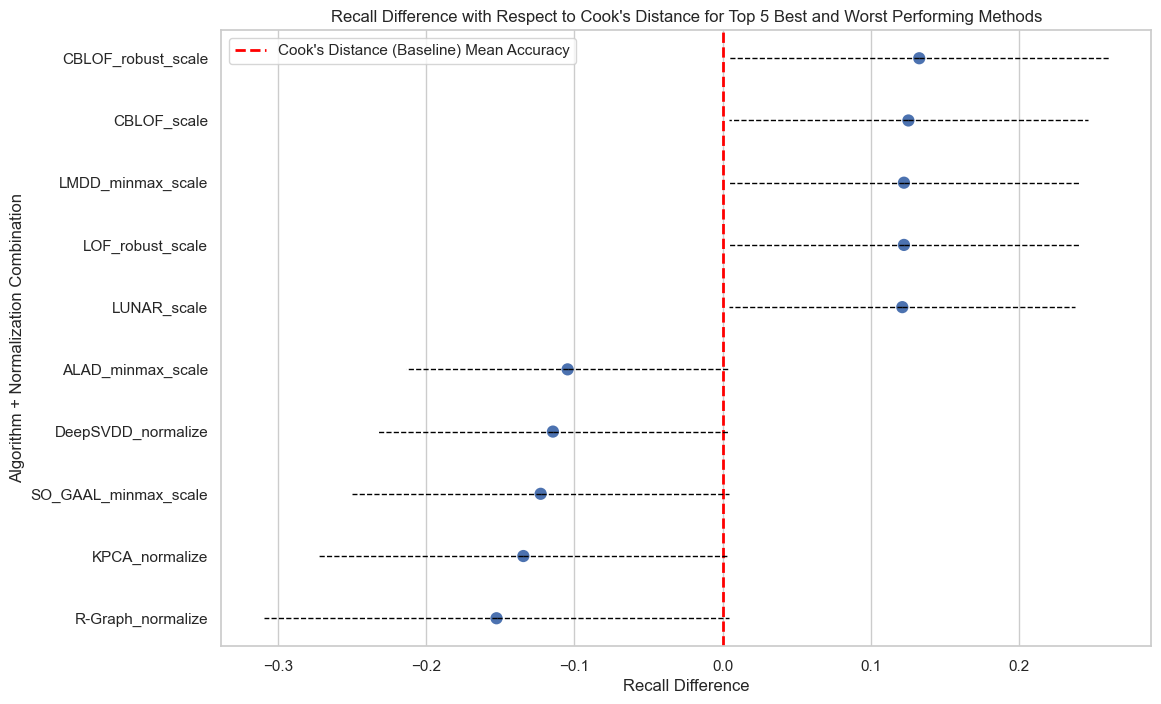

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.pointplot(x='Cook\'s Distance Difference', y='Methods', data=plots_df, ci="sd", join=False)

#horizontal line at 0
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Cook\'s Distance (Baseline) Mean Accuracy')

# connect each point to the corresponding Recall Difference
for i, (point, recall_diff) in enumerate(zip(plots_df['Cook\'s Distance Difference'], plots_df['Recall Difference'])):
    plt.plot([point, point + recall_diff], [i, i], color='black', linestyle='--', linewidth=1)
    plt.plot([point, point - recall_diff], [i, i], color='black', linestyle='--', linewidth=1)

plt.title("Recall Difference with Respect to Cook's Distance for Top 5 Best and Worst Performing Methods")
plt.xlabel("Recall Difference")
plt.ylabel('Algorithm + Normalization Combination')
plt.legend()
plt.show()